In [2]:

!pip install ultralytics roboflow --quiet
!nvidia-smi  # Verify T4 GPU


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uiIpENtp73grZiYxNBSl")
project = rf.workspace("engineer-bi8td").project("plastic-multiclass")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to plastic-multiclass-2 in yolov8:: 100%|██████████| 8002/8002 [00:01<00:00, 7394.43it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Nano model

# Critical parameters for fast convergence:
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,               # Reduced from 150
    imgsz=400,               # Reduced from 640 (faster training, better for T4 GPU)
    batch=16,                # Max for T4 with 400px
    patience=10,             # Early stopping if no improvement
    device=0,
    optimizer='AdamW',       # Better than SGD for fast convergence
    lr0=0.01,               # Higher initial LR (helps fast learning)
    cos_lr=True,             # Cosine LR scheduler (smoother descent)
    hsv_h=0.015,            # Mild augmentations
    fliplr=0.5,
    mosaic=0.5,              # Reduced from 1.0 (speeds up training)
    mixup=0.0,              # Disabled (slows training)
    name='plastic_50epoch_fast'
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 103MB/s]


Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/plastic-multiclass-2/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=400, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=0.5, multi_scale=False, name=plastic_50epoch_fast, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspective=0.0, plots=

100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    752287  ultralytics.nn.modules.head.Detect           [5, [64, 128, 256]]           
Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[400] must be multiple of max stride 32, updating to [416]
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1273.4±571.9 MB/s, size: 55.1 KB)


train: Scanning /content/plastic-multiclass-2/train/labels... 2797 images, 78 backgrounds, 0 corrupt: 100%|██████████| 2797/2797 [00:01<00:00, 2572.01it/s]


train: New cache created: /content/plastic-multiclass-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 730.6±607.5 MB/s, size: 48.9 KB)


val: Scanning /content/plastic-multiclass-2/valid/labels... 799 images, 25 backgrounds, 0 corrupt: 100%|██████████| 799/799 [00:00<00:00, 1186.82it/s]

val: New cache created: /content/plastic-multiclass-2/valid/labels.cache


Plotting labels to runs/detect/plastic_50epoch_fast/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/plastic_50epoch_fast
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.941G      1.454      2.631      1.549         37        416: 100%|██████████| 175/175 [00:33<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]

                   all        799       1406      0.286      0.183     0.0762     0.0364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.14G       1.61      2.611      1.666         24        416: 100%|██████████| 175/175 [00:30<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.16it/s]


                   all        799       1406      0.125      0.197      0.101     0.0513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.16G      1.522      2.507       1.63         28        416: 100%|██████████| 175/175 [00:30<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.85it/s]

                   all        799       1406      0.217        0.2      0.153     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.18G      1.451      2.405      1.575         51        416: 100%|██████████| 175/175 [00:31<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        799       1406      0.376      0.279      0.184      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.19G      1.383      2.335      1.534         22        416: 100%|██████████| 175/175 [00:29<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.13it/s]


                   all        799       1406       0.15      0.393       0.18      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.21G      1.321      2.282      1.488         31        416: 100%|██████████| 175/175 [00:29<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.19it/s]

                   all        799       1406      0.217      0.327      0.205      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.22G      1.288      2.232      1.458         33        416: 100%|██████████| 175/175 [00:29<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.26it/s]


                   all        799       1406       0.22      0.369       0.24      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.24G       1.23      2.176       1.43         28        416: 100%|██████████| 175/175 [00:30<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.21it/s]


                   all        799       1406      0.262      0.423      0.254      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.26G      1.206      2.144      1.405         31        416: 100%|██████████| 175/175 [00:29<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.17it/s]


                   all        799       1406      0.323      0.391      0.287      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.27G      1.189      2.084      1.397         18        416: 100%|██████████| 175/175 [00:29<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.25it/s]

                   all        799       1406      0.316      0.433      0.291      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.29G      1.149      2.055      1.359         31        416: 100%|██████████| 175/175 [00:29<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.17it/s]


                   all        799       1406      0.299      0.423      0.302      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.31G       1.13      2.018      1.356         39        416: 100%|██████████| 175/175 [00:30<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.08it/s]

                   all        799       1406      0.268      0.476      0.315      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.32G        1.1      1.972      1.336         47        416: 100%|██████████| 175/175 [00:29<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.17it/s]


                   all        799       1406      0.482      0.348      0.317      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.34G      1.096      1.974      1.335         48        416: 100%|██████████| 175/175 [00:29<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        799       1406      0.315       0.47      0.322       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.36G      1.073      1.896      1.307         38        416: 100%|██████████| 175/175 [00:29<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.20it/s]


                   all        799       1406       0.58      0.381      0.359      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.38G      1.062      1.921      1.308         29        416: 100%|██████████| 175/175 [00:30<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.28it/s]


                   all        799       1406      0.306      0.497      0.344      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.39G      1.037      1.877      1.287         27        416: 100%|██████████| 175/175 [00:29<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.28it/s]


                   all        799       1406      0.515       0.42      0.348      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.41G      1.027      1.865      1.281         26        416: 100%|██████████| 175/175 [00:29<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.28it/s]

                   all        799       1406      0.286      0.532      0.365      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.43G      1.003      1.833      1.279         32        416: 100%|██████████| 175/175 [00:29<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.29it/s]


                   all        799       1406      0.342      0.486      0.363      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.44G     0.9978      1.797      1.266         53        416: 100%|██████████| 175/175 [00:30<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.22it/s]


                   all        799       1406      0.352      0.452      0.375      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.46G      0.979      1.774      1.262         44        416: 100%|██████████| 175/175 [00:29<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.16it/s]

                   all        799       1406      0.581      0.402      0.363       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.48G      0.975      1.772      1.262         27        416: 100%|██████████| 175/175 [00:29<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]

                   all        799       1406      0.375      0.486      0.381      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.49G     0.9691      1.762      1.249         28        416: 100%|██████████| 175/175 [00:29<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.34it/s]


                   all        799       1406      0.392      0.472      0.385      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.51G     0.9356      1.733      1.229         28        416: 100%|██████████| 175/175 [00:30<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]

                   all        799       1406      0.379      0.489      0.378      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.53G     0.9622      1.729      1.245         40        416: 100%|██████████| 175/175 [00:29<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.06it/s]


                   all        799       1406      0.413      0.458      0.392      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.54G     0.9228      1.709      1.222         38        416: 100%|██████████| 175/175 [00:29<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]

                   all        799       1406      0.388      0.486      0.403      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.56G       0.92      1.697      1.214         27        416: 100%|██████████| 175/175 [00:30<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.24it/s]

                   all        799       1406      0.432      0.434      0.399      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.58G     0.9122      1.653      1.216         34        416: 100%|██████████| 175/175 [00:30<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]


                   all        799       1406      0.351      0.543        0.4      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.6G     0.9045      1.665      1.216         40        416: 100%|██████████| 175/175 [00:29<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.17it/s]


                   all        799       1406      0.371      0.521      0.417      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.61G     0.8883       1.63      1.192         36        416: 100%|██████████| 175/175 [00:29<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]

                   all        799       1406      0.422      0.417      0.418      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.63G     0.8767      1.614      1.188         33        416: 100%|██████████| 175/175 [00:29<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.22it/s]


                   all        799       1406      0.411      0.533      0.416      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.65G     0.8691      1.616      1.185         30        416: 100%|██████████| 175/175 [00:30<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        799       1406      0.366      0.567      0.414      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.66G     0.8607      1.574      1.183         23        416: 100%|██████████| 175/175 [00:29<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.28it/s]


                   all        799       1406      0.394      0.549      0.423      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.68G     0.8421      1.585      1.163         31        416: 100%|██████████| 175/175 [00:29<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.14it/s]

                   all        799       1406      0.392      0.545      0.432      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.7G     0.8407      1.566      1.166         34        416: 100%|██████████| 175/175 [00:30<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.29it/s]


                   all        799       1406      0.405      0.528      0.427      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.71G     0.8382      1.555       1.17         40        416: 100%|██████████| 175/175 [00:30<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.86it/s]


                   all        799       1406       0.41      0.532       0.43      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.73G     0.8233      1.534      1.157         36        416: 100%|██████████| 175/175 [00:29<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]


                   all        799       1406      0.421      0.571      0.435      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.75G     0.8066      1.499      1.147         38        416: 100%|██████████| 175/175 [00:29<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.16it/s]


                   all        799       1406      0.403      0.567      0.448      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.77G     0.8055      1.518      1.145         42        416: 100%|██████████| 175/175 [00:30<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.29it/s]


                   all        799       1406      0.414      0.534      0.437      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.78G     0.7999      1.489      1.142         60        416: 100%|██████████| 175/175 [00:30<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.56it/s]


                   all        799       1406      0.402      0.572      0.441      0.366
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.8G     0.6743      1.374      1.058         17        416: 100%|██████████| 175/175 [00:30<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.31it/s]


                   all        799       1406       0.42      0.548       0.44      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.82G     0.6539      1.344      1.043         25        416: 100%|██████████| 175/175 [00:29<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.32it/s]

                   all        799       1406      0.425      0.559      0.449      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.83G     0.6533      1.337       1.04         23        416: 100%|██████████| 175/175 [00:30<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.19it/s]


                   all        799       1406      0.405      0.545       0.45      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.85G     0.6515      1.335      1.042         24        416: 100%|██████████| 175/175 [00:28<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.22it/s]


                   all        799       1406      0.402      0.547      0.451      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.87G     0.6451      1.324      1.034         25        416: 100%|██████████| 175/175 [00:29<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]

                   all        799       1406      0.419      0.565      0.451      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.89G     0.6384       1.31      1.028         21        416: 100%|██████████| 175/175 [00:29<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.24it/s]


                   all        799       1406      0.409      0.572      0.459      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       1.9G     0.6285      1.304      1.029         22        416: 100%|██████████| 175/175 [00:29<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.48it/s]

                   all        799       1406      0.428      0.551      0.456      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.92G     0.6354      1.294      1.024         21        416: 100%|██████████| 175/175 [00:29<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.24it/s]


                   all        799       1406      0.414      0.552      0.458      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.94G     0.6319      1.275      1.029         24        416: 100%|██████████| 175/175 [00:29<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.23it/s]

                   all        799       1406      0.429      0.544       0.46      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.95G     0.6324      1.292      1.027         24        416: 100%|██████████| 175/175 [00:30<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.15it/s]


                   all        799       1406      0.417      0.549      0.459      0.384

50 epochs completed in 0.493 hours.
Optimizer stripped from runs/detect/plastic_50epoch_fast/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/plastic_50epoch_fast/weights/best.pt, 6.2MB

Validating runs/detect/plastic_50epoch_fast/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.42it/s]


                   all        799       1406      0.416      0.549      0.459      0.384
                   Bag        253        263      0.425       0.74      0.509      0.419
             Black-Bag         82         82      0.366      0.537       0.37      0.318
                Bottle        282        445      0.562       0.58      0.634      0.537
                   Cup        288        380      0.421      0.647      0.541      0.458
          Plastic_Item        180        236      0.306      0.242      0.242       0.19
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/plastic_50epoch_fast


In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Save ALL training artifacts
!cp -r /content/runs/detect/plastic_50epoch_fast /content/drive/MyDrive/plastic_project

# Save the best model separately
!cp /content/runs/detect/plastic_50epoch_fast/weights/best.pt /content/drive/MyDrive/plastic_project/best_45percent.pt

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import os

# 1. Load your best model (NOT using resume=True)
model = YOLO('/content/runs/detect/plastic_50epoch_fast/weights/best.pt')

# 2. Continue training with new parameters
results = model.train(
    # Critical settings for continuation:
    epochs=150,           # New total epochs (will train for 100 more)
    imgsz=640,
    batch=8,

    # Improved training parameters:
    lr0=0.001,           # Reduced from 0.01 for better fine-tuning
    cos_lr=True,          # Smooth learning rate decay
    optimizer='AdamW',

    # Enhanced augmentations:
    mixup=0.1,           # Was 0.0
    copy_paste=0.1,       # Was 0.0
    mosaic=1.0,           # Was 0.5
    hsv_h=0.1,            # Increased from 0.015

    # Other settings:
    device=0,
    patience=20,
    name='plastic_continued'
)

# 3. Automatic saving every 30 minutes
import threading
import time

def autosave():
    while True:
        time.sleep(1800)  # 30 minutes
        model.save('/content/drive/MyDrive/plastic_project/latest.pt')

thread = threading.Thread(target=autosave)
thread.daemon = True
thread.start()

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/plastic-multiclass-2/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.1, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=/content/runs/detect/plastic_50epoch_fast/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plastic_continued, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask

train: Scanning /content/plastic-multiclass-2/train/labels.cache... 2797 images, 78 backgrounds, 0 corrupt: 100%|██████████| 2797/2797 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 334.6±97.6 MB/s, size: 48.9 KB)


val: Scanning /content/plastic-multiclass-2/valid/labels.cache... 799 images, 25 backgrounds, 0 corrupt: 100%|██████████| 799/799 [00:00<?, ?it/s]


Plotting labels to runs/detect/plastic_continued/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/plastic_continued
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      1.69G       1.11      1.891      1.527         18        640: 100%|██████████| 350/350 [01:05<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.93it/s]


                   all        799       1406      0.365      0.502       0.38      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.83G      1.032      1.832      1.456         20        640: 100%|██████████| 350/350 [01:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.89it/s]

                   all        799       1406      0.341      0.512      0.384      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.83G     0.9923      1.787      1.414         16        640: 100%|██████████| 350/350 [01:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.51it/s]

                   all        799       1406      0.356      0.532      0.405      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      1.83G     0.9865      1.767      1.407         16        640: 100%|██████████| 350/350 [01:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.16it/s]


                   all        799       1406      0.402      0.506      0.417      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      1.83G      0.959       1.73      1.383         17        640: 100%|██████████| 350/350 [01:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.06it/s]

                   all        799       1406      0.368      0.561      0.418      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      1.83G     0.9545       1.73      1.376         15        640: 100%|██████████| 350/350 [01:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.71it/s]

                   all        799       1406      0.373      0.553      0.416      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      1.83G     0.9607      1.739      1.384         16        640: 100%|██████████| 350/350 [01:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.52it/s]

                   all        799       1406      0.382      0.537      0.416      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      1.83G     0.9579      1.753      1.377         11        640: 100%|██████████| 350/350 [01:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.77it/s]

                   all        799       1406      0.365      0.552      0.419      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      1.83G     0.9283      1.698      1.348         17        640: 100%|██████████| 350/350 [01:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.89it/s]

                   all        799       1406      0.361      0.581      0.424      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      1.83G     0.9436      1.724      1.367         26        640: 100%|██████████| 350/350 [01:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.60it/s]

                   all        799       1406      0.407      0.526      0.426      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      1.83G      0.941      1.714      1.359         23        640: 100%|██████████| 350/350 [01:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.97it/s]

                   all        799       1406      0.413      0.531      0.425      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      1.83G     0.9333      1.708       1.35         10        640: 100%|██████████| 350/350 [01:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.98it/s]

                   all        799       1406       0.41      0.547      0.418       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      1.83G     0.9339      1.709      1.356          9        640: 100%|██████████| 350/350 [01:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  7.12it/s]

                   all        799       1406      0.376       0.56      0.425      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      1.83G     0.9343        1.7      1.353         30        640: 100%|██████████| 350/350 [01:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.64it/s]

                   all        799       1406       0.39      0.559      0.426      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      1.83G     0.9324      1.713      1.355         25        640: 100%|██████████| 350/350 [00:59<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.31it/s]

                   all        799       1406      0.386      0.568      0.429      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      1.83G     0.9151      1.696      1.344         18        640: 100%|██████████| 350/350 [01:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.05it/s]

                   all        799       1406      0.412      0.512      0.417      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      1.83G     0.9307      1.691       1.35         20        640: 100%|██████████| 350/350 [00:59<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.58it/s]

                   all        799       1406      0.408      0.563      0.432      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      1.83G     0.9058      1.679      1.327         25        640: 100%|██████████| 350/350 [01:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.60it/s]


                   all        799       1406      0.378      0.554      0.428      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      1.83G     0.9089       1.67      1.335         17        640: 100%|██████████| 350/350 [01:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.27it/s]

                   all        799       1406      0.401      0.562      0.425      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      1.83G     0.9186      1.695       1.33         29        640: 100%|██████████| 350/350 [01:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.48it/s]

                   all        799       1406        0.4       0.53       0.43      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      1.83G      0.908      1.656      1.328         17        640: 100%|██████████| 350/350 [01:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.48it/s]

                   all        799       1406      0.387      0.586      0.434      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      1.83G     0.9051      1.663      1.317         27        640: 100%|██████████| 350/350 [01:02<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.62it/s]

                   all        799       1406       0.39      0.563      0.431      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      1.83G     0.9242      1.678      1.338         15        640: 100%|██████████| 350/350 [01:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.19it/s]


                   all        799       1406      0.382      0.575      0.435      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      1.83G     0.9004      1.637      1.322         15        640: 100%|██████████| 350/350 [01:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.14it/s]


                   all        799       1406      0.384      0.566      0.437      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      1.83G      0.905      1.662      1.326         21        640: 100%|██████████| 350/350 [00:59<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.56it/s]

                   all        799       1406      0.412      0.537      0.433      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      1.83G     0.9022      1.659      1.323         18        640: 100%|██████████| 350/350 [00:59<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.16it/s]

                   all        799       1406       0.38       0.55      0.434      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      1.83G     0.8939      1.642      1.321         27        640: 100%|██████████| 350/350 [01:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.06it/s]

                   all        799       1406       0.42      0.546      0.437      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      1.83G     0.9065      1.661      1.326         18        640: 100%|██████████| 350/350 [01:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.43it/s]

                   all        799       1406      0.391       0.57      0.441      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      1.83G     0.8936      1.634      1.316         13        640: 100%|██████████| 350/350 [01:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.59it/s]

                   all        799       1406      0.407      0.554      0.447      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      1.83G     0.9032      1.651      1.322         17        640: 100%|██████████| 350/350 [01:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.32it/s]


                   all        799       1406      0.427      0.538      0.437      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      1.83G     0.8965      1.629      1.324          8        640: 100%|██████████| 350/350 [01:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.27it/s]

                   all        799       1406      0.402       0.56      0.431      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      1.83G     0.8924      1.616      1.312         18        640: 100%|██████████| 350/350 [01:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.35it/s]

                   all        799       1406      0.395      0.542      0.437      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      1.83G     0.8881      1.633      1.316         21        640: 100%|██████████| 350/350 [00:59<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.57it/s]

                   all        799       1406      0.399      0.551      0.438      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      1.83G     0.9053      1.649      1.324         15        640: 100%|██████████| 350/350 [01:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.19it/s]

                   all        799       1406      0.388      0.575      0.442      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      1.83G     0.8914      1.615      1.317         28        640: 100%|██████████| 350/350 [01:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.12it/s]

                   all        799       1406      0.399      0.558      0.439      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      1.83G     0.8647      1.602      1.295         13        640: 100%|██████████| 350/350 [01:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.63it/s]

                   all        799       1406      0.409      0.534      0.439      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      1.83G     0.8887      1.619      1.309         17        640: 100%|██████████| 350/350 [01:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.45it/s]


                   all        799       1406      0.401       0.55       0.44      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      1.83G     0.8833      1.624      1.312         16        640: 100%|██████████| 350/350 [01:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.12it/s]

                   all        799       1406      0.411      0.547      0.438      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      1.83G     0.8683      1.619      1.302         14        640: 100%|██████████| 350/350 [01:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.84it/s]

                   all        799       1406       0.41      0.546      0.446      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      1.83G     0.8757      1.602      1.304         18        640: 100%|██████████| 350/350 [01:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.55it/s]

                   all        799       1406      0.419      0.554      0.449      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      1.83G     0.8744      1.611      1.297         19        640: 100%|██████████| 350/350 [01:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.93it/s]


                   all        799       1406      0.394      0.552      0.435      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      1.83G     0.8625      1.584      1.286         17        640: 100%|██████████| 350/350 [01:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.83it/s]

                   all        799       1406       0.43      0.522      0.445      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      1.83G     0.8762      1.586      1.306         24        640: 100%|██████████| 350/350 [01:03<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.76it/s]

                   all        799       1406      0.433      0.513      0.449      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      1.83G     0.8831      1.594      1.307         16        640: 100%|██████████| 350/350 [01:02<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.85it/s]

                   all        799       1406      0.413      0.563      0.452      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      1.83G     0.8668      1.595      1.298         14        640: 100%|██████████| 350/350 [01:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.41it/s]

                   all        799       1406      0.417      0.561      0.456      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      1.83G     0.8681      1.584      1.298         22        640: 100%|██████████| 350/350 [01:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.70it/s]


                   all        799       1406      0.416      0.558      0.446      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      1.83G     0.8633      1.562      1.293         11        640: 100%|██████████| 350/350 [01:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.93it/s]

                   all        799       1406      0.413      0.543      0.449      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      1.83G     0.8653      1.572      1.296         23        640: 100%|██████████| 350/350 [01:03<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.94it/s]

                   all        799       1406      0.436      0.529      0.453       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      1.83G       0.86      1.566       1.29         20        640: 100%|██████████| 350/350 [01:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.38it/s]

                   all        799       1406      0.435       0.56      0.453      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      1.83G     0.8634      1.588      1.293         25        640: 100%|██████████| 350/350 [01:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.53it/s]

                   all        799       1406      0.439      0.559      0.457      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      1.83G     0.8661      1.596      1.296         15        640: 100%|██████████| 350/350 [01:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.50it/s]

                   all        799       1406      0.449      0.532      0.455      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      1.83G      0.851      1.556       1.28         24        640: 100%|██████████| 350/350 [01:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.36it/s]

                   all        799       1406      0.438      0.537      0.456      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      1.83G      0.866      1.585        1.3         28        640: 100%|██████████| 350/350 [01:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.02it/s]

                   all        799       1406      0.433      0.556      0.458      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      1.83G     0.8635      1.574      1.293         18        640: 100%|██████████| 350/350 [01:02<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.65it/s]

                   all        799       1406      0.413      0.558      0.448      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      1.83G     0.8604      1.574      1.289         14        640: 100%|██████████| 350/350 [01:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.42it/s]

                   all        799       1406      0.433      0.533      0.456      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      1.83G     0.8717      1.581      1.295         17        640: 100%|██████████| 350/350 [01:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.43it/s]

                   all        799       1406      0.414      0.549      0.452      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      1.83G     0.8589      1.556      1.289         20        640: 100%|██████████| 350/350 [01:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.98it/s]

                   all        799       1406      0.439      0.548      0.455      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      1.83G     0.8671      1.567      1.293         17        640: 100%|██████████| 350/350 [01:02<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.11it/s]

                   all        799       1406       0.43      0.552      0.459      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      1.83G     0.8578      1.565      1.289         17        640: 100%|██████████| 350/350 [01:03<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.10it/s]

                   all        799       1406      0.437       0.57      0.466      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      1.83G      0.849      1.549      1.272         29        640: 100%|██████████| 350/350 [01:02<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.49it/s]

                   all        799       1406      0.432      0.555      0.463      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      1.83G     0.8569      1.553      1.284         25        640: 100%|██████████| 350/350 [01:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.51it/s]

                   all        799       1406      0.422      0.543      0.458      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      1.83G     0.8608      1.545      1.282         17        640: 100%|██████████| 350/350 [01:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.52it/s]

                   all        799       1406      0.445      0.531      0.459      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      1.83G     0.8558       1.55      1.282         20        640: 100%|██████████| 350/350 [01:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.15it/s]

                   all        799       1406      0.426      0.535      0.455      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      1.83G     0.8459      1.557      1.273          7        640: 100%|██████████| 350/350 [01:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.06it/s]

                   all        799       1406      0.432      0.522      0.458      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      1.83G     0.8496      1.543      1.283         28        640: 100%|██████████| 350/350 [01:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.60it/s]

                   all        799       1406       0.44       0.51      0.461      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      1.83G     0.8582       1.55      1.287          7        640: 100%|██████████| 350/350 [01:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.50it/s]

                   all        799       1406      0.456      0.533       0.47      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      1.83G     0.8567      1.538      1.279          8        640: 100%|██████████| 350/350 [01:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.38it/s]

                   all        799       1406      0.443      0.548      0.457      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      1.83G     0.8604      1.536      1.292         16        640: 100%|██████████| 350/350 [01:02<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.95it/s]

                   all        799       1406      0.431      0.559      0.469      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      1.83G     0.8405      1.536      1.279         13        640: 100%|██████████| 350/350 [01:03<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.54it/s]

                   all        799       1406      0.429      0.564      0.465      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      1.83G     0.8504      1.523      1.284         19        640: 100%|██████████| 350/350 [01:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.51it/s]

                   all        799       1406      0.447      0.541      0.467      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      1.83G     0.8529      1.541      1.283         14        640: 100%|██████████| 350/350 [01:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.52it/s]

                   all        799       1406      0.463      0.533       0.47      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      1.83G     0.8484      1.529      1.279         22        640: 100%|██████████| 350/350 [01:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.19it/s]

                   all        799       1406       0.45      0.543      0.471      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      1.83G     0.8468      1.515      1.276         23        640: 100%|██████████| 350/350 [01:02<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.12it/s]

                   all        799       1406      0.449      0.546      0.467      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      1.83G      0.844       1.52      1.273         16        640: 100%|██████████| 350/350 [01:02<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.56it/s]

                   all        799       1406      0.459      0.543      0.467      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      1.83G      0.849      1.542      1.286         17        640: 100%|██████████| 350/350 [01:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.44it/s]

                   all        799       1406      0.454      0.543       0.47       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      1.83G     0.8444      1.541      1.277         20        640: 100%|██████████| 350/350 [01:02<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.50it/s]

                   all        799       1406      0.436      0.559      0.466      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      1.83G     0.8426       1.54      1.275         19        640: 100%|██████████| 350/350 [01:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.98it/s]

                   all        799       1406      0.441      0.563      0.465      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      1.83G     0.8438      1.517      1.272         16        640: 100%|██████████| 350/350 [01:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.10it/s]

                   all        799       1406      0.457      0.563      0.473      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      1.83G     0.8287      1.519      1.265         19        640: 100%|██████████| 350/350 [01:03<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.00it/s]

                   all        799       1406      0.472      0.528      0.472      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      1.83G     0.8323      1.513       1.27         17        640: 100%|██████████| 350/350 [01:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.63it/s]

                   all        799       1406       0.47      0.528      0.474      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      1.83G     0.8303      1.508      1.273         25        640: 100%|██████████| 350/350 [01:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.56it/s]

                   all        799       1406      0.467      0.539      0.472      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      1.83G     0.8308      1.497      1.269         22        640: 100%|██████████| 350/350 [01:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.90it/s]

                   all        799       1406      0.477      0.527      0.471      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      1.83G     0.8353      1.498      1.256         31        640:  30%|██▉       | 104/350 [00:19<00:45,  5.38it/s]


KeyboardInterrupt: 

In [ ]:
import torch
from google.colab import drive

# Free up GPU memory
torch.cuda.empty_cache()

# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# Verify interrupted training files
!ls /content/runs/detect/plastic_*/weights/last.pt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/runs/detect/plastic_50epoch_fast/weights/last.pt
/content/runs/detect/plastic_continued/weights/last.pt


In [ ]:
from ultralytics import YOLO
import os

# Load interrupted model (automatically finds latest checkpoint)
model = YOLO('/content/runs/detect/plastic_continued/weights/last.pt')

# Hyperparameter-optimized training
results = model.train(
    resume=True,  # Critical for continuing

    # Extended training
    epochs=200,   # New total target (adds 123 more epochs)

    # Enhanced learning schedule
    lr0=0.0003,   # Reduced base LR (was 0.0005)
    lrf=0.005,    # Final LR = 0.0000015
    warmup_epochs=3,

    # Advanced augmentations
    mixup=0.3,    # Increased from 0.1
    cutmix=0.1,   # New augmentation
    copy_paste=0.3,
    hsv_h=0.3,    # Maximum color variation
    fliplr=0.8,   # More flips

    # Loss rebalancing
    cls=1.0,      # Increased class loss weight
    box=9.0,      # Stronger box regression

    # System config
    device=0,
    patience=50,  # Longer wait for improvement
    name='plastic_optimized'
)

# Real-time monitoring
import pandas as pd
from IPython.display import clear_output

def live_monitor():
    while True:
        try:
            df = pd.read_csv(f'/content/runs/detect/{model.trainer.args.name}/results.csv')
            clear_output(wait=True)
            print(df.tail(3))
        except:
            pass
        time.sleep(60)

import threading
thread = threading.Thread(target=live_monitor)
thread.daemon = True
thread.start()

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/plastic-multiclass-2/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.1, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=/content/runs/detect/plastic_continued/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plastic_continued, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=Tr

train: Scanning /content/plastic-multiclass-2/train/labels.cache... 2797 images, 78 backgrounds, 0 corrupt: 100%|██████████| 2797/2797 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 467.4±79.9 MB/s, size: 48.9 KB)


val: Scanning /content/plastic-multiclass-2/valid/labels.cache... 799 images, 25 backgrounds, 0 corrupt: 100%|██████████| 799/799 [00:00<?, ?it/s]


Plotting labels to runs/detect/plastic_continued/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/runs/detect/plastic_continued/weights/last.pt from epoch 83 to 150 total epochs
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/plastic_continued
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150       1.1G     0.8448      1.516       1.28         18        640: 100%|██████████| 350/350 [01:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▌    | 28/50 [00:03<00:03,  6.09it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fee10ae5bc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fe

                   all        799       1406       0.44      0.552      0.471       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      1.29G     0.8316      1.515      1.269         20        640: 100%|██████████| 350/350 [01:07<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:11<00:00,  4.41it/s]

                   all        799       1406      0.467      0.536      0.474      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      1.29G     0.8233      1.498      1.259         16        640: 100%|██████████| 350/350 [01:03<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.86it/s]

                   all        799       1406      0.468      0.528      0.482        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      1.29G     0.8404      1.503      1.275         16        640: 100%|██████████| 350/350 [01:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.55it/s]

                   all        799       1406      0.468      0.516      0.476      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      1.29G     0.8155       1.48      1.257         17        640: 100%|██████████| 350/350 [01:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.50it/s]

                   all        799       1406      0.472      0.545      0.474      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      1.29G     0.8186      1.479      1.258         15        640: 100%|██████████| 350/350 [01:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.27it/s]


                   all        799       1406      0.469      0.541       0.47       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      1.29G     0.8233      1.493      1.266         16        640: 100%|██████████| 350/350 [01:01<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.03it/s]

                   all        799       1406      0.485      0.542      0.474      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      1.29G     0.8338      1.503      1.271         11        640: 100%|██████████| 350/350 [01:03<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.75it/s]

                   all        799       1406      0.469      0.536      0.474      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      1.29G     0.8063      1.468      1.248         17        640: 100%|██████████| 350/350 [01:02<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.26it/s]

                   all        799       1406      0.466      0.531      0.473      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150       1.3G     0.8214      1.493      1.264         26        640: 100%|██████████| 350/350 [01:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.44it/s]

                   all        799       1406      0.482      0.528      0.477      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150       1.3G     0.8221      1.479      1.259         23        640: 100%|██████████| 350/350 [01:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.78it/s]


                   all        799       1406      0.468      0.547      0.478      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150       1.3G     0.8156      1.477      1.254         10        640: 100%|██████████| 350/350 [01:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.05it/s]

                   all        799       1406      0.456      0.548      0.475      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150       1.3G     0.8182      1.489      1.262          9        640: 100%|██████████| 350/350 [01:02<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.01it/s]

                   all        799       1406      0.462      0.541      0.475      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      1.32G     0.8243      1.474      1.262         30        640: 100%|██████████| 350/350 [01:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.44it/s]

                   all        799       1406      0.448       0.56      0.481      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      1.32G     0.8175      1.488      1.261         25        640: 100%|██████████| 350/350 [01:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.48it/s]

                   all        799       1406      0.451      0.546      0.472      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      1.32G     0.8096       1.47      1.254         18        640: 100%|██████████| 350/350 [01:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.69it/s]


                   all        799       1406      0.484      0.518      0.473      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      1.32G      0.822       1.47      1.264         20        640: 100%|██████████| 350/350 [01:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.97it/s]

                   all        799       1406      0.471      0.538      0.477      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      1.32G     0.8032      1.457      1.244         25        640: 100%|██████████| 350/350 [01:02<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.04it/s]

                   all        799       1406       0.48       0.53      0.478      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      1.32G     0.8014      1.457       1.25         17        640: 100%|██████████| 350/350 [01:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.21it/s]

                   all        799       1406      0.463      0.547      0.481      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      1.32G     0.8136       1.48      1.248         29        640: 100%|██████████| 350/350 [01:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.35it/s]

                   all        799       1406      0.468      0.524      0.475      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      1.32G     0.8104       1.45      1.249         17        640: 100%|██████████| 350/350 [01:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.72it/s]

                   all        799       1406      0.473      0.527      0.481        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      1.32G     0.8061      1.452      1.239         27        640: 100%|██████████| 350/350 [01:01<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.99it/s]

                   all        799       1406      0.445      0.548      0.479      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      1.32G     0.8228      1.473      1.256         15        640: 100%|██████████| 350/350 [01:03<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.03it/s]

                   all        799       1406      0.466      0.528      0.477      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      1.32G     0.8006      1.432      1.241         15        640: 100%|██████████| 350/350 [01:01<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.78it/s]

                   all        799       1406      0.465      0.534      0.481      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      1.32G     0.8047      1.464      1.246         21        640: 100%|██████████| 350/350 [01:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.40it/s]

                   all        799       1406      0.454       0.54       0.48      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      1.32G      0.812      1.458       1.25         18        640: 100%|██████████| 350/350 [01:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.57it/s]

                   all        799       1406      0.457      0.545       0.48        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      1.32G     0.8028      1.444      1.249         27        640: 100%|██████████| 350/350 [01:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.01it/s]


                   all        799       1406      0.481      0.521      0.486      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      1.32G     0.8199       1.47      1.254         18        640: 100%|██████████| 350/350 [01:02<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.06it/s]

                   all        799       1406      0.464      0.551      0.483      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      1.32G     0.8046      1.444      1.245         13        640: 100%|██████████| 350/350 [01:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.56it/s]

                   all        799       1406      0.468      0.527      0.478      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      1.32G     0.8102      1.452      1.248         17        640: 100%|██████████| 350/350 [01:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.56it/s]

                   all        799       1406      0.458      0.551      0.483      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      1.32G     0.8132      1.445      1.254          8        640: 100%|██████████| 350/350 [01:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.47it/s]

                   all        799       1406      0.465      0.533      0.482      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      1.32G     0.8021      1.432      1.242         18        640: 100%|██████████| 350/350 [01:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.00it/s]

                   all        799       1406       0.47      0.549       0.48      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      1.32G     0.8015      1.442      1.247         21        640: 100%|██████████| 350/350 [00:59<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.52it/s]

                   all        799       1406      0.472      0.533       0.48      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      1.32G     0.8205      1.457      1.257         15        640: 100%|██████████| 350/350 [01:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.57it/s]


                   all        799       1406      0.473      0.538      0.482      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      1.32G     0.8074      1.434      1.249         28        640: 100%|██████████| 350/350 [00:59<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.13it/s]

                   all        799       1406      0.484      0.522       0.48        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      1.32G     0.7739      1.501      1.234         29        640:   8%|▊         | 29/350 [00:06<01:09,  4.63it/s]


KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO
import torch

# 1. CHOOSE THE MOST RECENT CHECKPOINT (or specify which one to use)
checkpoint_path = "/content/runs/detect/plastic_continued/weights/last.pt"  # Using the more recent one

# 2. Verify the checkpoint exists
!ls -lh {checkpoint_path}

# 3. Load model with verification
try:
    model = YOLO(checkpoint_path)
    print(f"✓ Successfully loaded {checkpoint_path}")
except Exception as e:
    print(f"Error loading checkpoint: {e}")
    print("Falling back to fresh model...")
    model = YOLO('yolov8n.pt')

# 4. Resume training with optimized parameters
results = model.train(
    resume=True,  # Critical for continuing
    epochs=200,   # New total target

    # Enhanced Learning Configuration
    lr0=0.0005,           # Gentle restart
    lrf=0.01,             # Slow decay
    warmup_epochs=5,

    # Boosted Augmentations
    mixup=0.3,            # Increased from 0.1
    copy_paste=0.2,        # Object pasting
    mosaic=1.0,
    hsv_h=0.2,            # Stronger color variation

    # Loss Rebalancing
    cls=1.0,              # Increased class weight
    box=9.0,              # Stronger box regression

    # System
    device=0,
    workers=2,            # Safe multiprocessing
    patience=30,          # Longer wait for improvement
    name='plastic_final_attempt'
)

# 5. Automatic saving (run in background)
import threading
import time

def autosave():
    while True:
        time.sleep(1800)  # Every 30 minutes
        model.save('/content/drive/MyDrive/plastic_project/latest.pt')
        print("✓ Progress saved to Drive")

thread = threading.Thread(target=autosave)
thread.daemon = True
thread.start()

-rw-r--r-- 1 root root 18M May  4 07:51 /content/runs/detect/plastic_continued/weights/last.pt
✓ Successfully loaded /content/runs/detect/plastic_continued/weights/last.pt
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/plastic-multiclass-2/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.1, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=/content/runs/detect/plastic_conti

train: Scanning /content/plastic-multiclass-2/train/labels.cache... 2797 images, 78 backgrounds, 0 corrupt: 100%|██████████| 2797/2797 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 283.1±168.9 MB/s, size: 48.9 KB)


val: Scanning /content/plastic-multiclass-2/valid/labels.cache... 799 images, 25 backgrounds, 0 corrupt: 100%|██████████| 799/799 [00:00<?, ?it/s]


Plotting labels to runs/detect/plastic_continued/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/runs/detect/plastic_continued/weights/last.pt from epoch 118 to 150 total epochs
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/plastic_continued
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      1.15G     0.8098      1.449      1.254         18        640: 100%|██████████| 350/350 [01:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.21it/s]

                   all        799       1406      0.475      0.544      0.484      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      1.38G      0.797      1.441      1.243         20        640: 100%|██████████| 350/350 [01:01<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.46it/s]

                   all        799       1406      0.485       0.53      0.482      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      1.38G      0.787      1.425      1.233         16        640: 100%|██████████| 350/350 [01:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.51it/s]

                   all        799       1406      0.481      0.536      0.487      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      1.38G     0.8035      1.433      1.249         16        640: 100%|██████████| 350/350 [01:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.85it/s]


                   all        799       1406      0.482      0.531      0.482      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      1.38G      0.779      1.381      1.231         40        640:  30%|██▉       | 104/350 [00:17<00:42,  5.80it/s]


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
import shutil
import os

# Mount Drive (force remount if needed)
drive.mount('/content/drive', force_remount=True)

# 1. Save entire training folder
save_path = '/content/drive/MyDrive/plastic_project_backup'
os.makedirs(save_path, exist_ok=True)
!cp -r /content/runs/detect/plastic_continued {save_path}

# 2. Save the model weights
!cp /content/runs/detect/plastic_continued/weights/last.pt {save_path}/last_121.pt
!cp /content/runs/detect/plastic_continued/weights/best.pt {save_path}/best_121.pt

print(f"✓ Saved checkpoint at epoch 121 to {save_path}")

Mounted at /content/drive
✓ Saved checkpoint at epoch 121 to /content/drive/MyDrive/plastic_project_backup


In [ ]:
from ultralytics import YOLO

# 1. Load from saved checkpoint
model = YOLO('/content/drive/MyDrive/plastic_project_backup/last_121.pt')

# 2. Training with proper epoch continuation
results = model.train(
    resume=True,  # This will automatically continue from epoch 121
    epochs=200,   # New total target (will show as 121/200)

    # Enhanced parameters
    lr0=0.0005,
    lrf=0.01,

    # Augmentations
    mixup=0.3,
    copy_paste=0.2,
    mosaic=1.0,

    # System
    device=0,
    workers=2,
    name='plastic_200epochs'
)

# 3. Auto-backup (run in background)
import threading
import time

def backup():
    while True:
        time.sleep(1800)  # Every 30 minutes
        !cp /content/runs/detect/plastic_200epochs/weights/last.pt /content/drive/MyDrive/plastic_project_backup/last_autosave.pt
        print(f"✓ Backup at {time.strftime('%H:%M')}")

thread = threading.Thread(target=backup, daemon=True)
thread.start()

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/plastic-multiclass-2/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.1, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=/content/drive/MyDrive/plastic_project_backup/last_121.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plastic_continued, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask

train: Scanning /content/plastic-multiclass-2/train/labels.cache... 2797 images, 78 backgrounds, 0 corrupt: 100%|██████████| 2797/2797 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 317.9±58.0 MB/s, size: 48.9 KB)


val: Scanning /content/plastic-multiclass-2/valid/labels.cache... 799 images, 25 backgrounds, 0 corrupt: 100%|██████████| 799/799 [00:00<?, ?it/s]


Plotting labels to runs/detect/plastic_continued/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/drive/MyDrive/plastic_project_backup/last_121.pt from epoch 122 to 150 total epochs
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/plastic_continued
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      1.43G     0.7931      1.427      1.244         18        640: 100%|██████████| 350/350 [01:03<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.18it/s]

                   all        799       1406       0.48      0.539      0.483      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      1.45G     0.7808      1.418      1.234         20        640: 100%|██████████| 350/350 [01:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.62it/s]

                   all        799       1406      0.486      0.522       0.48      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      1.45G     0.7739      1.406      1.225         16        640: 100%|██████████| 350/350 [01:01<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.46it/s]

                   all        799       1406      0.483       0.53      0.485      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      1.47G     0.7923      1.418      1.243         16        640: 100%|██████████| 350/350 [01:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.72it/s]

                   all        799       1406      0.478       0.53      0.482      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      1.47G       0.78       1.41      1.233         17        640: 100%|██████████| 350/350 [01:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.98it/s]

                   all        799       1406      0.486      0.533      0.482      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      1.47G     0.7848      1.412      1.235         15        640: 100%|██████████| 350/350 [01:01<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.37it/s]

                   all        799       1406      0.488      0.532       0.48      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      1.47G     0.7875      1.426      1.241         16        640: 100%|██████████| 350/350 [01:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.50it/s]

                   all        799       1406      0.485      0.529      0.479        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      1.48G     0.8003      1.441      1.248         11        640: 100%|██████████| 350/350 [01:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.71it/s]


                   all        799       1406      0.484      0.527       0.48      0.399

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      1.49G     0.7764      1.407      1.228         17        640: 100%|██████████| 350/350 [01:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.06it/s]

                   all        799       1406      0.473      0.537      0.478      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      1.49G     0.7906       1.43       1.24         26        640: 100%|██████████| 350/350 [01:02<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.16it/s]

                   all        799       1406      0.477       0.54      0.479      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      1.49G       0.79      1.417      1.235         23        640: 100%|██████████| 350/350 [01:01<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.88it/s]

                   all        799       1406       0.49      0.525      0.481        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      1.49G     0.7859      1.418      1.233         10        640: 100%|██████████| 350/350 [01:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.56it/s]

                   all        799       1406      0.492       0.52      0.481      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      1.49G     0.7868      1.429      1.241          9        640: 100%|██████████| 350/350 [01:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.89it/s]

                   all        799       1406      0.493      0.519       0.48      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      1.49G     0.7947      1.415      1.241         30        640: 100%|██████████| 350/350 [01:01<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.08it/s]

                   all        799       1406      0.489      0.525      0.481        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      1.49G      0.789      1.425      1.242         25        640: 100%|██████████| 350/350 [01:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.65it/s]

                   all        799       1406      0.484      0.527      0.479      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      1.49G     0.7806      1.419      1.235         18        640: 100%|██████████| 350/350 [01:01<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.56it/s]

                   all        799       1406      0.484      0.523      0.478      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      1.49G      0.795       1.42      1.244         20        640: 100%|██████████| 350/350 [01:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.87it/s]


                   all        799       1406      0.477      0.531      0.481      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      1.49G     0.7758      1.407      1.225         25        640: 100%|██████████| 350/350 [01:01<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.01it/s]

                   all        799       1406      0.479      0.528       0.48        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      1.49G     0.7757       1.41      1.231         17        640: 100%|██████████| 350/350 [01:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.67it/s]

                   all        799       1406      0.487      0.523      0.481      0.401


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      1.49G     0.6298      1.268      1.132          5        640: 100%|██████████| 350/350 [00:56<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.08it/s]

                   all        799       1406      0.483      0.522      0.481      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      1.49G     0.6291      1.255      1.134          7        640: 100%|██████████| 350/350 [00:55<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.51it/s]

                   all        799       1406      0.471      0.525      0.479      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      1.49G     0.6312      1.258      1.136         13        640: 100%|██████████| 350/350 [00:55<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.12it/s]

                   all        799       1406      0.475      0.522       0.48      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      1.49G      0.634      1.243      1.139          9        640: 100%|██████████| 350/350 [00:56<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.77it/s]

                   all        799       1406      0.473      0.526       0.48      0.396
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 124, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



23 epochs completed in 0.433 hours.
Optimizer stripped from runs/detect/plastic_continued/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/plastic_continued/weights/best.pt, 6.3MB

Validating runs/detect/plastic_continued/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.43it/s]


                   all        799       1406      0.481      0.534      0.487      0.406
                   Bag        253        263      0.472      0.631      0.513      0.419
             Black-Bag         82         82      0.457      0.524      0.397      0.328
                Bottle        282        445      0.637      0.587      0.664      0.566
                   Cup        288        380      0.479      0.574      0.559      0.473
          Plastic_Item        180        236      0.358      0.356      0.301      0.243
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/plastic_continued


In [ ]:
from ultralytics import YOLO

# Load your best checkpoint (automatically finds latest)
model = YOLO('/content/runs/detect/plastic_continued/weights/best.pt')
print("✓ Loaded best weights from epoch 124")

✓ Loaded best weights from epoch 124


In [ ]:
results = model.train(
    # Extended training
    epochs=300,          # New higher target
    patience=50,         # Increased from 20

    # Enhanced learning
    lr0=0.0001,         # Lower base LR
    lrf=0.001,          # Slow decay
    warmup_epochs=10,

    # Nuclear augmentations
    augment=True,
    auto_augment='randaugment',
    mixup=0.5,
    copy_paste=0.4,

    # System
    device=0,
    name='plastic_final_push'
)

# Real-time monitoring (optional)
!tail -f /content/runs/detect/plastic_final_push/results.csv

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.4, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/plastic-multiclass-2/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.001, mask_ratio=4, max_det=300, mixup=0.5, mode=train, model=/content/runs/detect/plastic_continued/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plastic_final_push, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_ma

train: Scanning /content/plastic-multiclass-2/train/labels.cache... 2797 images, 78 backgrounds, 0 corrupt: 100%|██████████| 2797/2797 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 375.2±110.7 MB/s, size: 48.9 KB)


val: Scanning /content/plastic-multiclass-2/valid/labels.cache... 799 images, 25 backgrounds, 0 corrupt: 100%|██████████| 799/799 [00:00<?, ?it/s]


Plotting labels to runs/detect/plastic_final_push/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/plastic_final_push
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.21G      1.031      1.754      1.439         48        640: 100%|██████████| 175/175 [01:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.91it/s]

                   all        799       1406      0.452      0.552      0.478      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      2.67G      1.014      1.711      1.414         59        640: 100%|██████████| 175/175 [01:07<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.95it/s]

                   all        799       1406      0.437      0.546      0.476      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      2.67G      1.005      1.709        1.4         67        640: 100%|██████████| 175/175 [01:05<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]

                   all        799       1406      0.454      0.541      0.476      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.67G      1.005      1.714      1.406         82        640: 100%|██████████| 175/175 [01:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.84it/s]

                   all        799       1406       0.46      0.508       0.45      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.67G      1.015      1.724      1.407         60        640: 100%|██████████| 175/175 [01:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.93it/s]

                   all        799       1406       0.47      0.525      0.461      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.67G      1.015      1.732      1.409         78        640: 100%|██████████| 175/175 [01:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.82it/s]

                   all        799       1406      0.437      0.521      0.444      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      2.67G      1.031       1.75      1.421         48        640: 100%|██████████| 175/175 [01:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.81it/s]

                   all        799       1406      0.406      0.595      0.469      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.67G      1.013      1.752      1.403         71        640: 100%|██████████| 175/175 [01:05<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.80it/s]

                   all        799       1406      0.446      0.556      0.447      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.67G      1.032      1.739      1.417         56        640: 100%|██████████| 175/175 [01:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.96it/s]

                   all        799       1406      0.446      0.542      0.462      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      2.67G      1.032       1.75      1.418         76        640: 100%|██████████| 175/175 [01:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.99it/s]

                   all        799       1406      0.422      0.562      0.455       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      2.67G      1.045      1.766      1.433         60        640: 100%|██████████| 175/175 [01:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.86it/s]

                   all        799       1406      0.438      0.525      0.432       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      2.67G      1.051      1.794       1.43         71        640: 100%|██████████| 175/175 [01:04<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.64it/s]

                   all        799       1406      0.421      0.548      0.451      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.67G      1.043      1.795      1.433         53        640: 100%|██████████| 175/175 [01:03<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.24it/s]

                   all        799       1406      0.406      0.589      0.454       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.67G      1.031      1.778      1.421         52        640: 100%|██████████| 175/175 [01:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.12it/s]

                   all        799       1406      0.455      0.568      0.456      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.67G      1.045      1.802      1.424         69        640: 100%|██████████| 175/175 [01:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.28it/s]

                   all        799       1406      0.435      0.563      0.459      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.67G      1.033      1.767      1.411         60        640: 100%|██████████| 175/175 [01:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.08it/s]

                   all        799       1406       0.39      0.568      0.452      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.67G       1.03      1.773      1.413         66        640: 100%|██████████| 175/175 [01:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.12it/s]

                   all        799       1406      0.451      0.538      0.454      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.67G       1.02      1.742      1.403         80        640: 100%|██████████| 175/175 [01:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.23it/s]

                   all        799       1406      0.449      0.526       0.46      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      2.67G      1.034      1.756      1.417         59        640: 100%|██████████| 175/175 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.45it/s]

                   all        799       1406      0.387      0.571      0.442      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.67G      1.034      1.765      1.418         74        640: 100%|██████████| 175/175 [01:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.83it/s]

                   all        799       1406      0.441      0.545      0.468      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.67G      1.029      1.759      1.418         74        640: 100%|██████████| 175/175 [01:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.94it/s]

                   all        799       1406      0.433      0.529      0.457      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.67G      1.029      1.754      1.411         92        640:  10%|▉         | 17/175 [00:06<00:56,  2.80it/s]

cp: cannot stat '/content/runs/detect/plastic_200epochs/weights/last.pt': No such file or directory
✓ Backup at 09:04


     22/300      2.67G      1.023      1.739      1.407         60        640: 100%|██████████| 175/175 [01:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]

                   all        799       1406      0.414       0.56      0.463       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.67G      1.022      1.764       1.41         66        640: 100%|██████████| 175/175 [01:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.60it/s]

                   all        799       1406      0.416      0.532      0.435      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      2.67G      1.018      1.745      1.407         67        640: 100%|██████████| 175/175 [01:04<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.70it/s]

                   all        799       1406      0.426      0.537       0.46      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.67G      1.016      1.742      1.402         53        640: 100%|██████████| 175/175 [01:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.50it/s]

                   all        799       1406      0.427      0.552      0.467      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      2.67G      1.029      1.751       1.41         66        640: 100%|██████████| 175/175 [01:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.21it/s]

                   all        799       1406      0.421      0.528      0.458      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      2.67G      1.028      1.756      1.416         70        640: 100%|██████████| 175/175 [01:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.13it/s]

                   all        799       1406      0.407      0.555      0.456      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      2.67G      1.022      1.736      1.413         85        640: 100%|██████████| 175/175 [01:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.14it/s]

                   all        799       1406      0.422       0.56      0.445      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      2.67G       1.01      1.727      1.399         78        640: 100%|██████████| 175/175 [01:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  3.05it/s]

                   all        799       1406      0.435      0.512      0.443       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      2.67G      1.003      1.655      1.395         65        640:  15%|█▍        | 26/175 [00:07<00:41,  3.58it/s]

In [5]:
from google.colab import drive
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load your best saved model
model_path = '/content/drive/MyDrive/plastic_project_backup/best_121.pt'  # Update with your path
model = YOLO(model_path)

# Verify model loaded
print(f"Model loaded from: {model_path}")
print(f"Classes: {model.names}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model loaded from: /content/drive/MyDrive/plastic_project_backup/best_121.pt
Classes: {0: 'Bag', 1: 'Black-Bag', 2: 'Bottle', 3: 'Cup', 4: 'Plastic_Item'}


In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uiIpENtp73grZiYxNBSl")
project = rf.workspace("engineer-bi8td").project("plastic-multiclass")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to plastic-multiclass-2 in yolov8:: 100%|██████████| 8002/8002 [00:02<00:00, 3837.98it/s]


In [10]:
from ultralytics import YOLO

# Load your saved model
model = YOLO('/content/drive/MyDrive/plastic_project_backup/plastic_continued/weights/best.pt')

# Roboflow automatically creates this path structure
data_path = f"{dataset.location}/data.yaml"

# Generate all metrics
results = model.val(
    data=data_path,  # Uses Roboflow's auto-generated YAML
    split='test',    # Or 'val' for validation set
    plots=True,      # Creates confusion matrix
    name='roboflow_eval'
)

Ultralytics 8.3.126 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 24.4MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 985.6±310.0 MB/s, size: 66.4 KB)



val: Scanning /content/plastic-multiclass-2/test/labels... 399 images, 13 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<00:00, 1617.61it/s]

val: New cache created: /content/plastic-multiclass-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [02:28<00:00,  5.94s/it]


                   all        399        699       0.44      0.512      0.457      0.375
                   Bag        120        125      0.513      0.688      0.504      0.414
             Black-Bag         34         35      0.232      0.343      0.312       0.26
                Bottle        171        268      0.604      0.546      0.595      0.489
                   Cup        132        173      0.514      0.624      0.574      0.476
          Plastic_Item         84         98      0.337      0.357      0.303      0.238
Speed: 11.3ms preprocess, 349.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/roboflow_eval


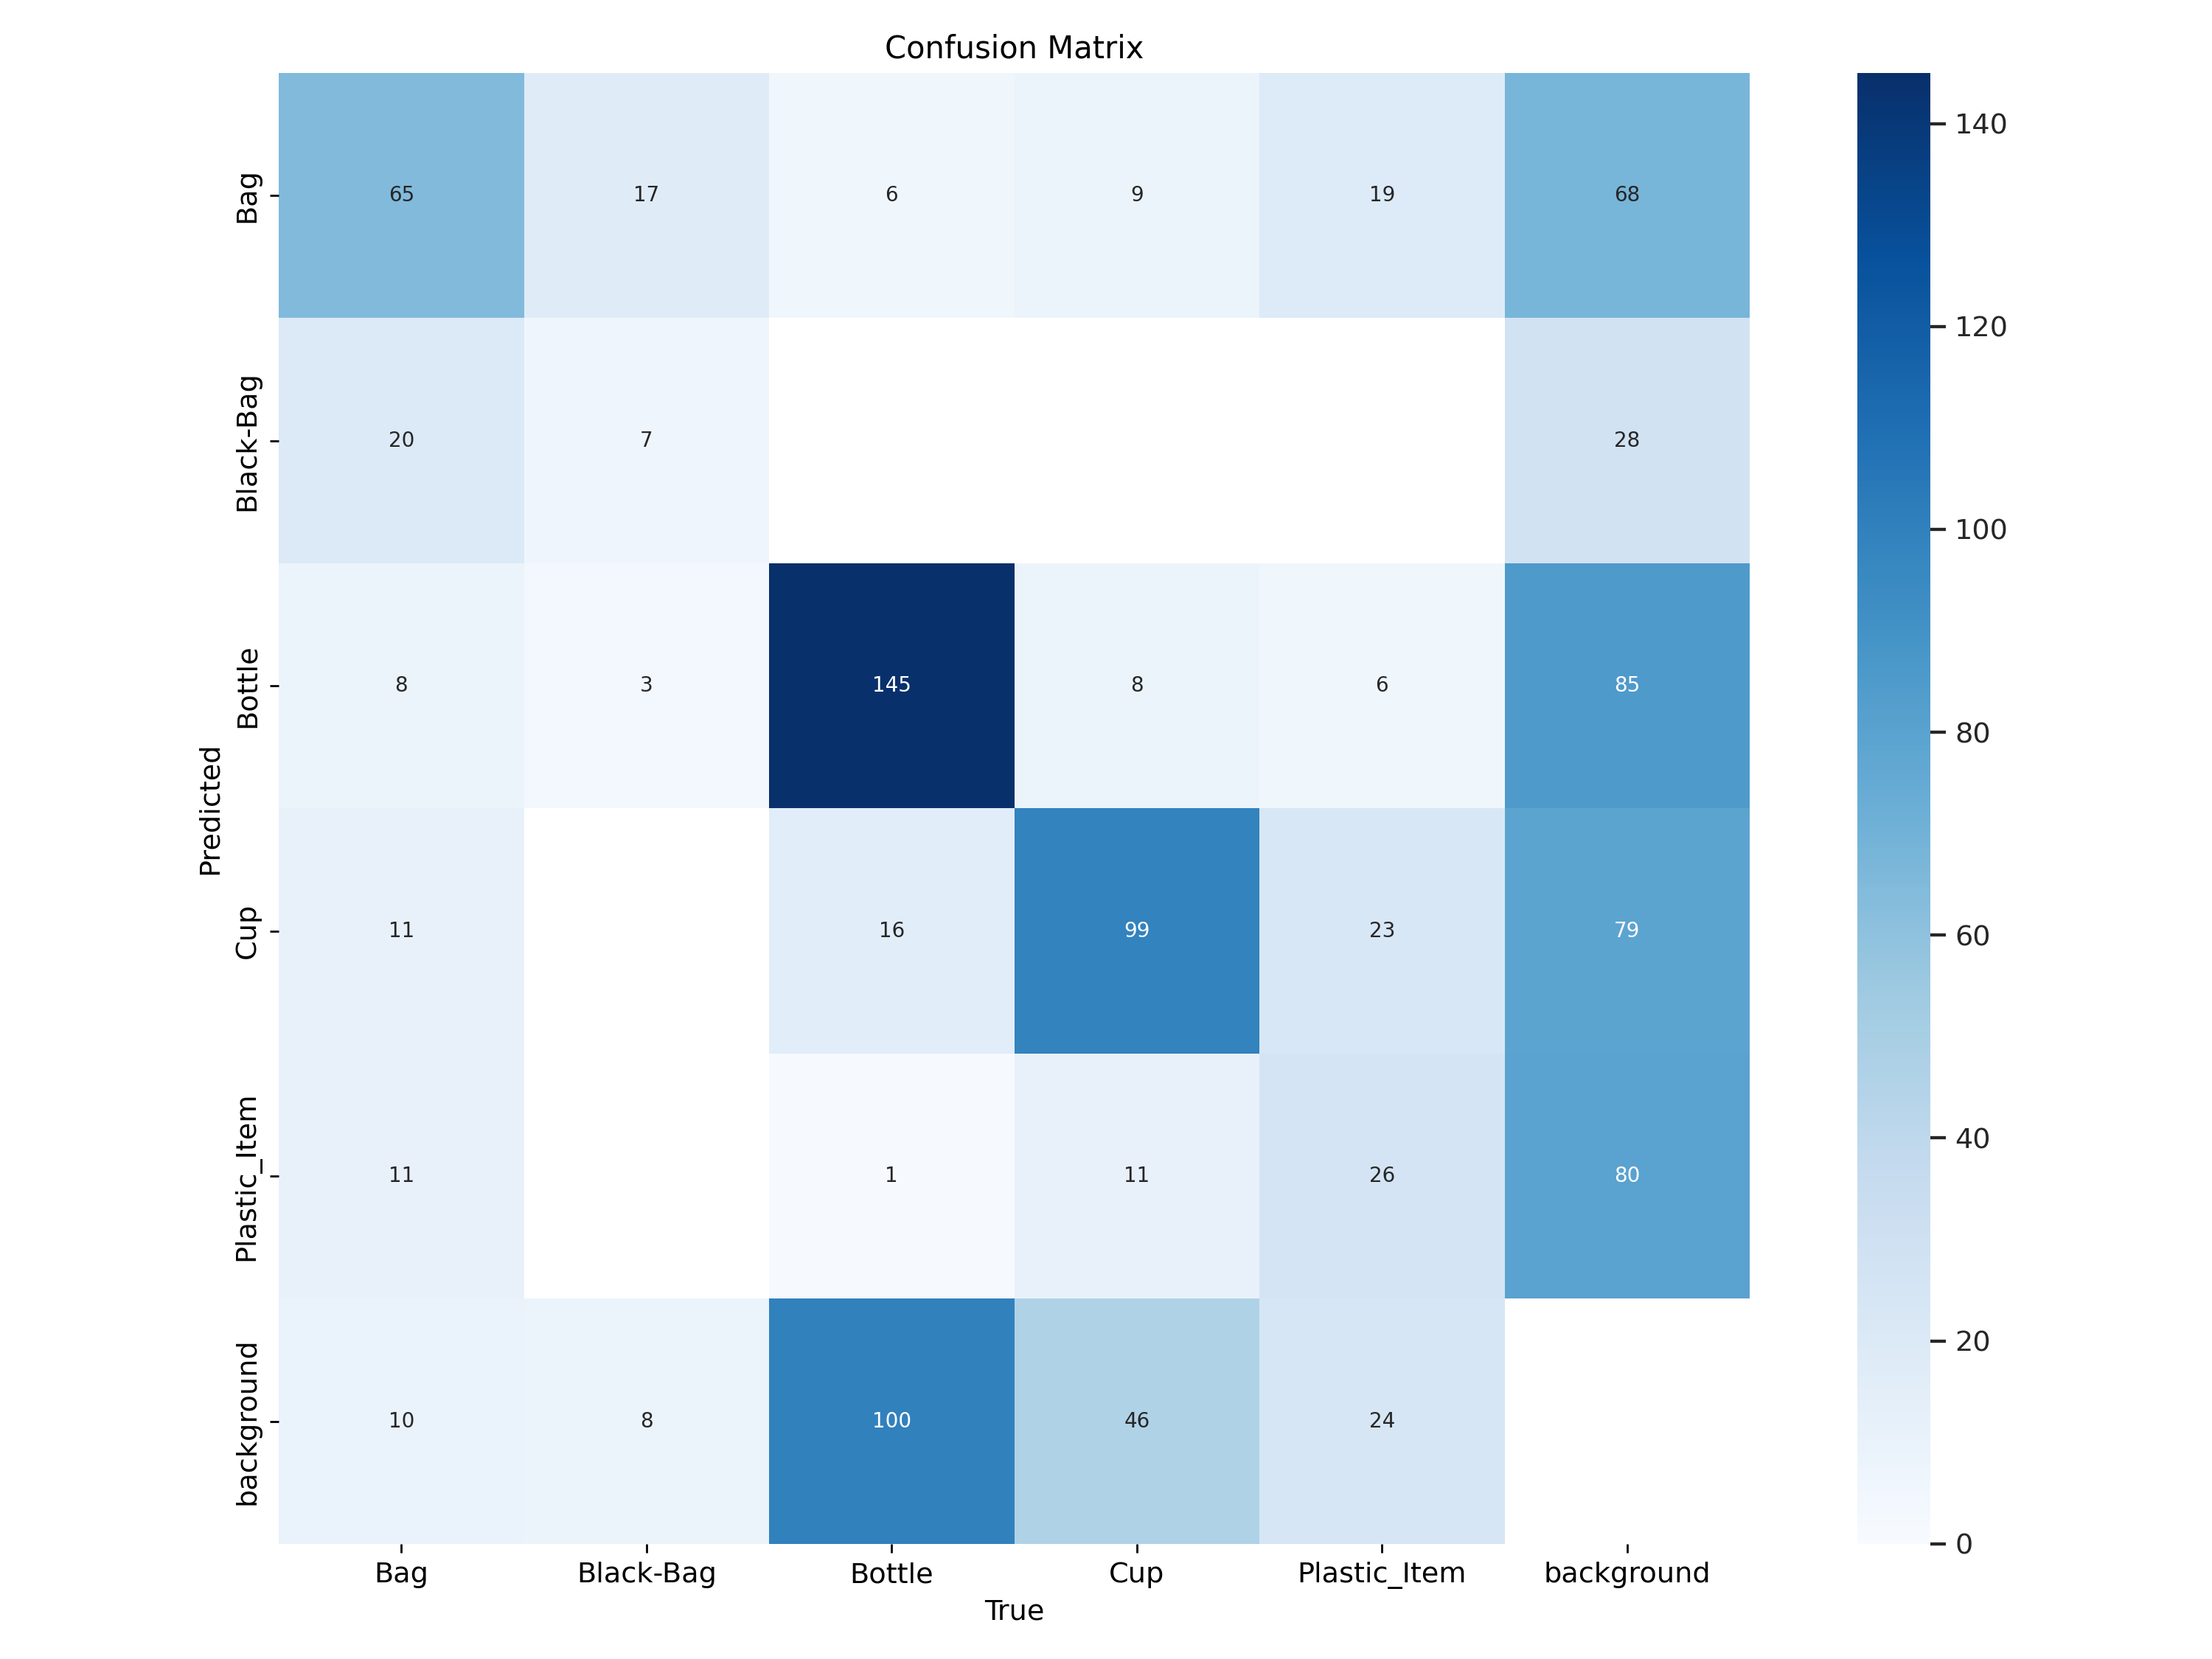

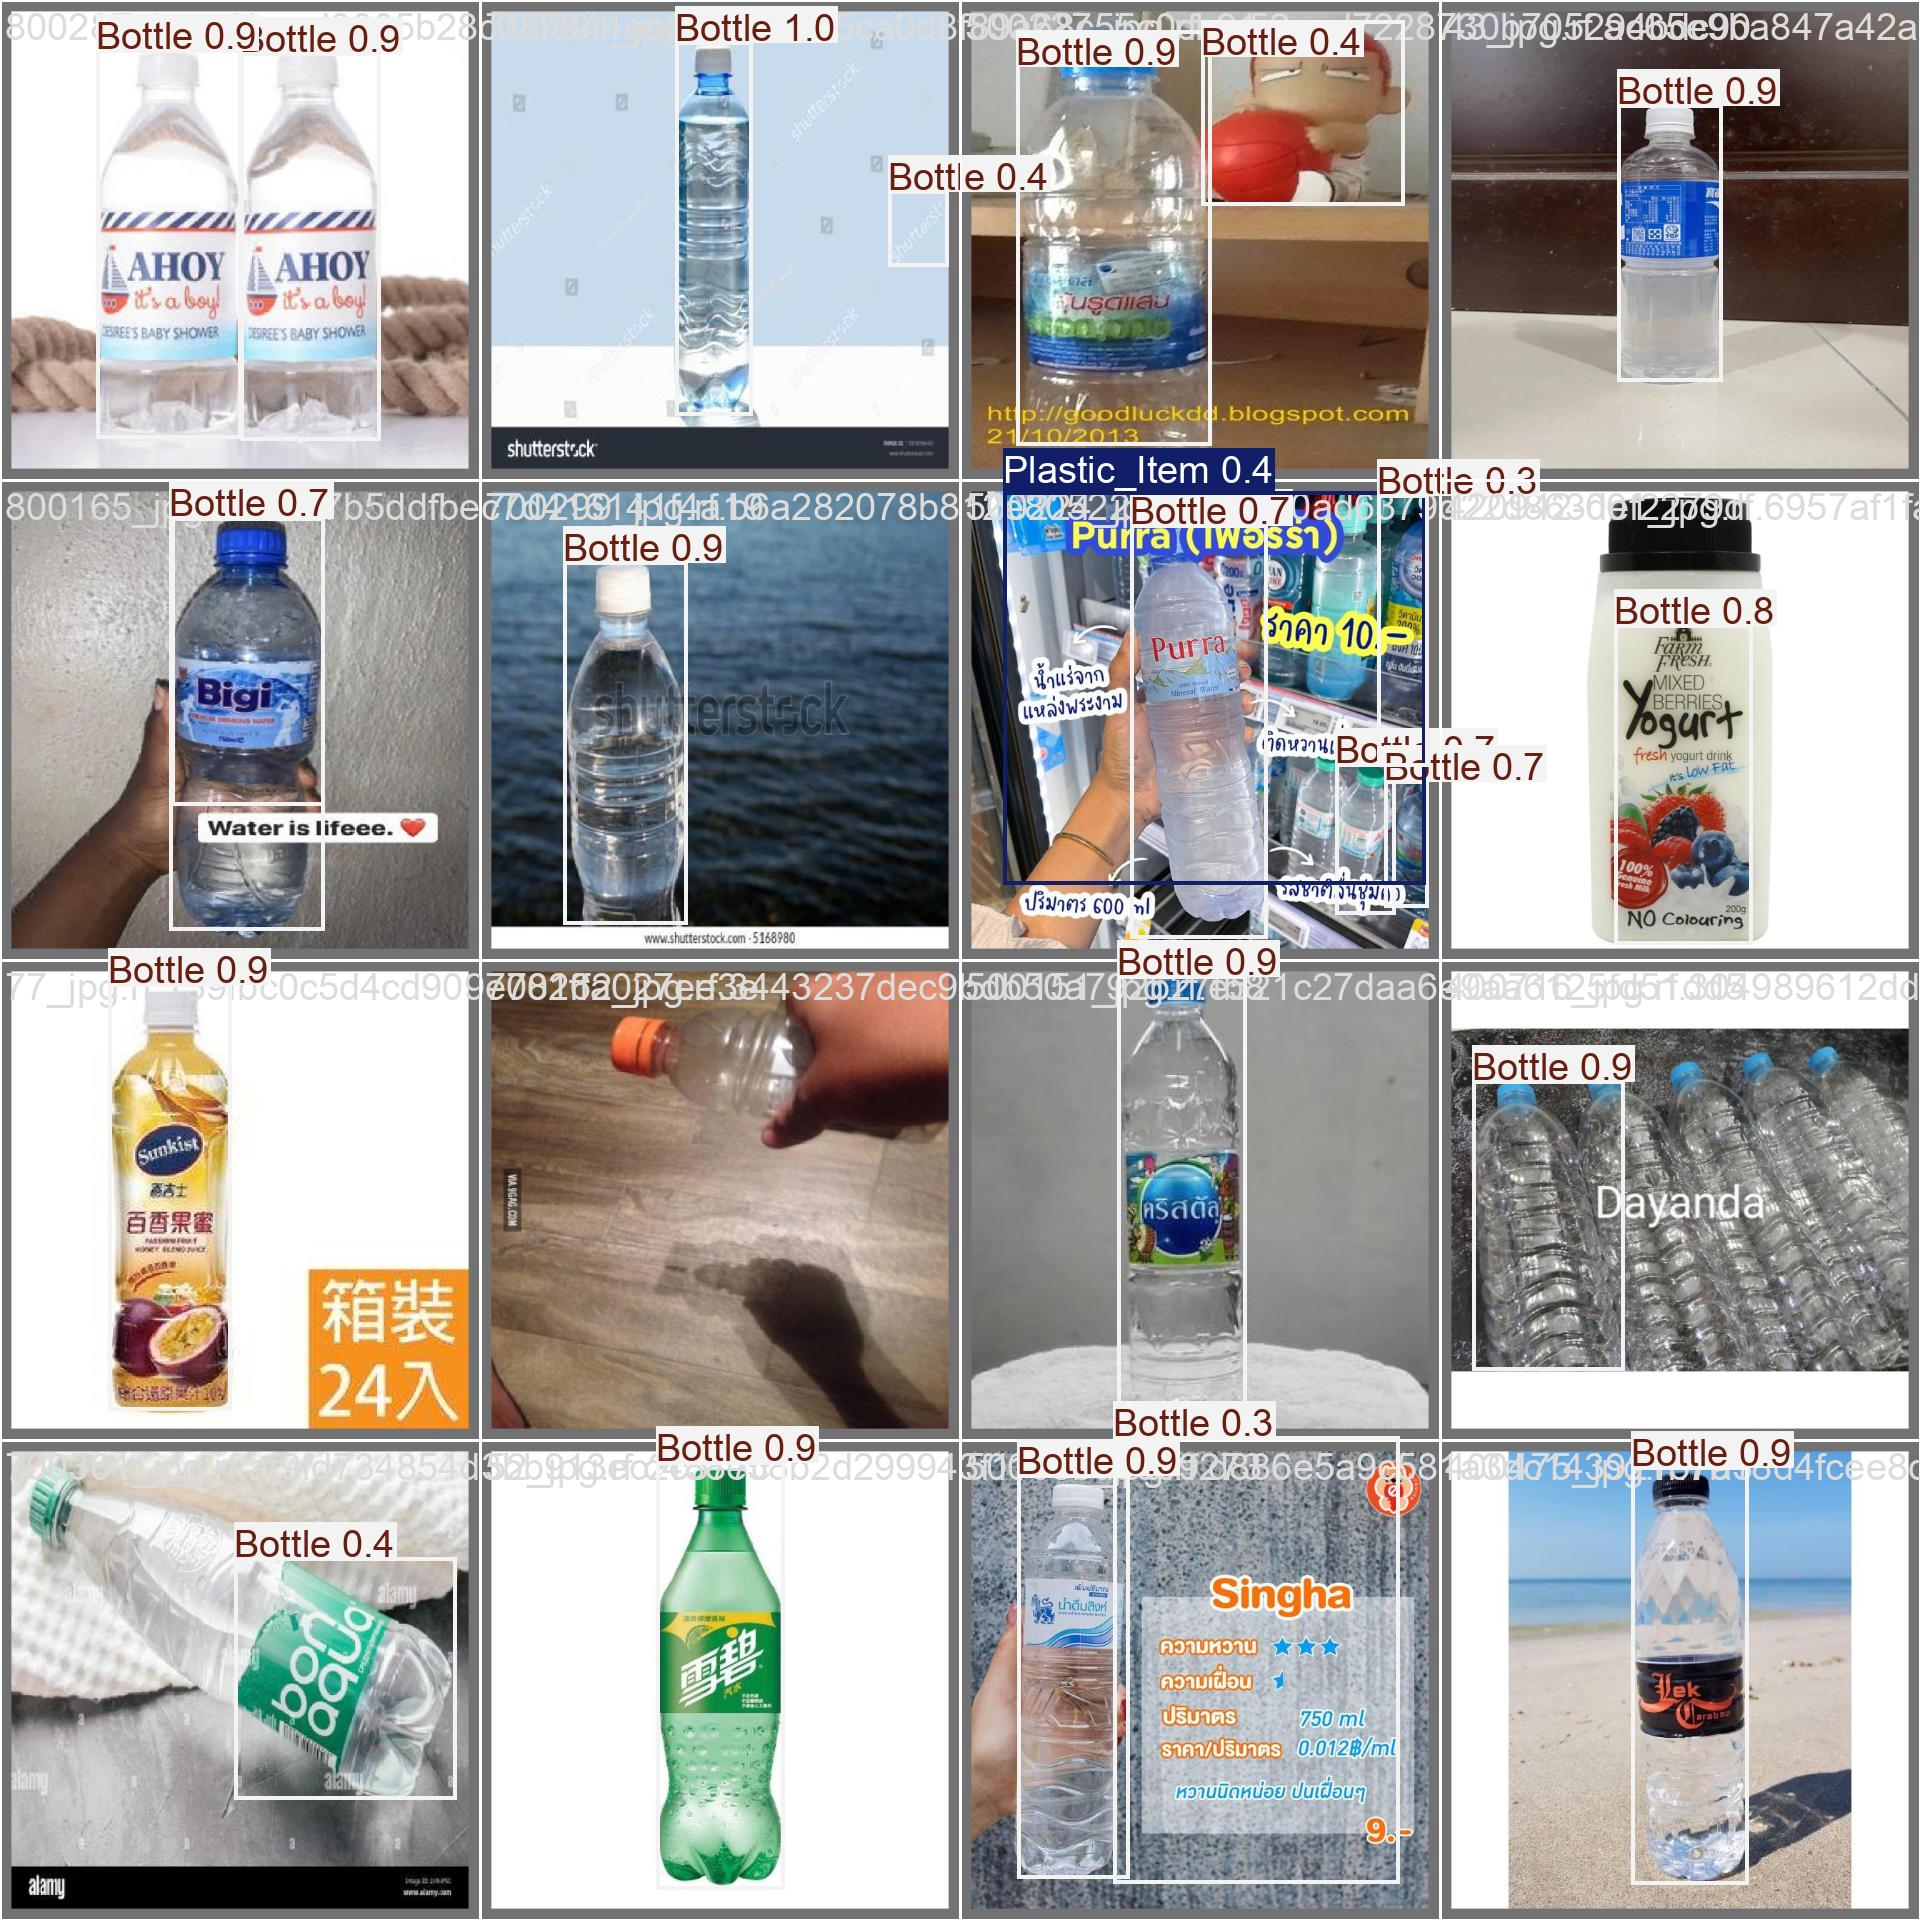

In [11]:
from IPython.display import Image

# Confusion Matrix
display(Image(filename='/content/runs/detect/roboflow_eval/confusion_matrix.png'))

# Other plots
display(Image(filename='/content/runs/detect/roboflow_eval/val_batch0_pred.jpg'))